In [1]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [2]:
import pandas as pd

red_wine = pd.read_csv('../../datasets/Intro_to_Deep_Learning/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape

(1599, 12)

# Input shape

How well can we predict a wine's perceived quality from the physiochemical measurements ?

The traget is `quality`, and the remaining columns are the features. How would you set the
`input_shape` parameter for Keras model on this task ?



In [4]:
input_shape = [11]


# Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs
and outputs the model should have.



In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=input_shape)
])

# Look at the weights

Internally, Keras represents the weights of a neural network with tensors. Tensors are
basically TensorFlow's version of a Numpy array with a few differences that make them
better suited to deep learning. One of the most important is that tensors are compatible
with GPU and TPU accelerators. TPUs, in fact, are designed specifically for tensor computations

A model's weights are kept in its `weights` attribute as a list of tensors. Get the weights
of the model you defined above.

In [6]:
w, b = model.weights

In [7]:
print("Weight\n{}\n\nBias\n{}".format(w, b))

Weight
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.57458574],
       [-0.1868397 ],
       [-0.22611445],
       [ 0.40740222],
       [-0.13250327],
       [-0.41260836],
       [ 0.6218403 ],
       [-0.08806312],
       [ 0.23242807],
       [-0.5536336 ],
       [ 0.62915164]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


# Optional :Plot the output of an untrained linear model

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model(x)

In [13]:
x

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-1.        , -0.97979796, -0.959596  , -0.93939394, -0.9191919 ,
       -0.8989899 , -0.8787879 , -0.85858583, -0.83838385, -0.8181818 ,
       -0.79797983, -0.7777778 , -0.75757575, -0.7373737 , -0.7171717 ,
       -0.6969697 , -0.6767677 , -0.65656567, -0.6363636 , -0.6161616 ,
       -0.5959596 , -0.57575756, -0.5555556 , -0.53535354, -0.5151515 ,
       -0.49494952, -0.47474748, -0.45454544, -0.43434346, -0.41414142,
       -0.39393938, -0.3737374 , -0.35353535, -0.3333333 , -0.31313133,
       -0.2929293 , -0.27272725, -0.25252527, -0.23232323, -0.21212119,
       -0.19191921, -0.17171717, -0.15151513, -0.13131315, -0.1111111 ,
       -0.09090906, -0.07070708, -0.05050504, -0.030303  , -0.01010102,
        0.01010096,  0.030303  ,  0.05050504,  0.07070708,  0.09090912,
        0.11111116,  0.13131309,  0.15151513,  0.17171717,  0.19191921,
        0.21212125,  0.23232329,  0.2525252 ,  0.27272725,  0.2929293 ,
        0.313131

In [14]:
y

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[ 0.8860037 ],
       [ 0.8681046 ],
       [ 0.85020554],
       [ 0.8323065 ],
       [ 0.8144074 ],
       [ 0.7965084 ],
       [ 0.7786093 ],
       [ 0.7607102 ],
       [ 0.7428112 ],
       [ 0.7249121 ],
       [ 0.7070131 ],
       [ 0.689114  ],
       [ 0.6712149 ],
       [ 0.65331584],
       [ 0.6354168 ],
       [ 0.6175177 ],
       [ 0.5996187 ],
       [ 0.5817196 ],
       [ 0.5638205 ],
       [ 0.54592144],
       [ 0.5280224 ],
       [ 0.5101233 ],
       [ 0.49222428],
       [ 0.4743252 ],
       [ 0.4564261 ],
       [ 0.4385271 ],
       [ 0.420628  ],
       [ 0.40272892],
       [ 0.3848299 ],
       [ 0.3669308 ],
       [ 0.34903175],
       [ 0.3311327 ],
       [ 0.3132336 ],
       [ 0.29533455],
       [ 0.2774355 ],
       [ 0.25953642],
       [ 0.24163735],
       [ 0.22373831],
       [ 0.20583923],
       [ 0.18794015],
       [ 0.17004113],
       [ 0.15214205],
       [ 0.13424295],
    

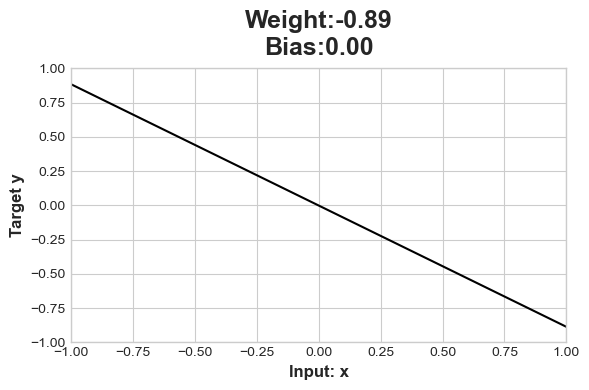

In [15]:
plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights
plt.title("Weight:{:0.2f}\nBias:{:0.2f}".format(w[0][0], b[0]))
plt.show()